In [72]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings("ignore")

In [73]:
# importing the data
data = pd.read_csv("titanic_train.csv")

In [74]:
data.shape

(891, 12)

In [75]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [76]:
# getting the info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


As we can see we have total 891 entries with 12 columns also there are some missing values are present

In [77]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Here Age, Cabin and Embarked columns have missing values 

Since the Cabin column is not usefull for us we are gonna drop it.

In [83]:
data.drop(columns = 'Cabin',axis = 1,inplace = True)

As we drop the Cabin Columns but we cannot Drop the Age column


In [79]:
# Handling the mising values in Age columns
data["Age"].fillna(data["Age"].mean(),inplace = True)


In [80]:
# We have 2 missing values in Embarked
# since this is non numerical column so we have to replace mode value inplace of missing value.
print(data["Embarked"].mode())

0    S
Name: Embarked, dtype: object


In [81]:
#replacing the missing value with mode
data["Embarked"].fillna(data["Embarked"].mode()[0],inplace = True)

In [84]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Statistical Summary

In [85]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [87]:
# Lets find the number of people survived and not survived
data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

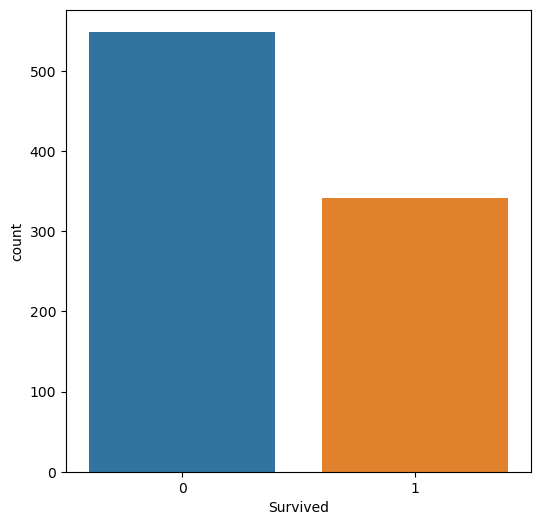

In [89]:
# EDA
plt.figure(figsize = (6,6))
sns.countplot(data["Survived"])
plt.show()

In [90]:
data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

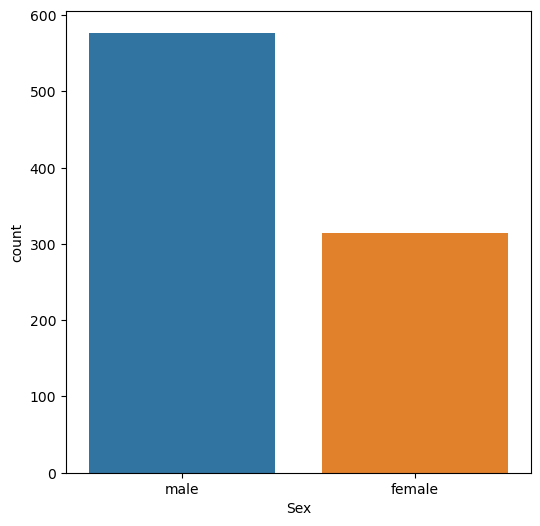

In [91]:
# Male and Female Passenger
plt.figure(figsize = (6,6))
sns.countplot(data["Sex"])
plt.show()

<AxesSubplot:xlabel='Sex', ylabel='count'>

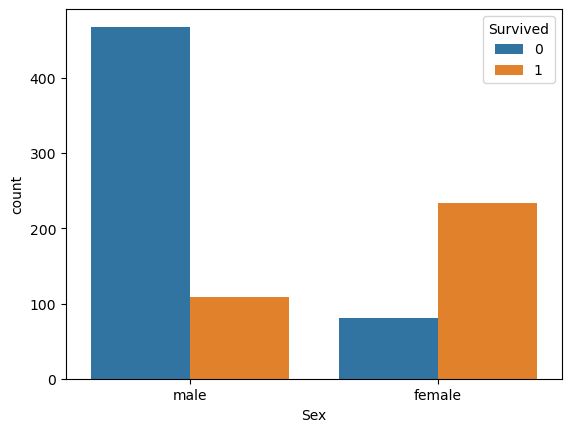

In [97]:
# number of survivours base on Sex
sns.countplot(data["Sex"],hue = data["Survived"])

As we can see more females are survived as compare to males

<AxesSubplot:xlabel='Pclass', ylabel='count'>

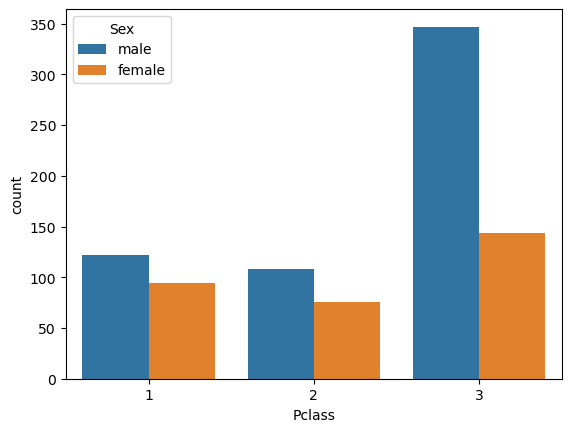

In [99]:
# Lets check the survivour based on pclass
sns.countplot(data["Pclass"],hue = data["Sex"])

Pclass 3 has most survived passengers.

# Data Preprocessing

In [100]:
from sklearn.preprocessing import LabelEncoder

In [101]:
le = LabelEncoder()

In [102]:
data["Sex"] = le.fit_transform(data["Sex"])

In [103]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [104]:
data["Embarked"].head(10)

0    S
1    C
2    S
3    S
4    S
5    Q
6    S
7    S
8    S
9    C
Name: Embarked, dtype: object

In [ ]:
# C -- > 0 
# Q -- > 1
# s -- > 2

In [105]:
data["Embarked"] = le.fit_transform(data["Embarked"])

In [106]:
data["Embarked"].head(10)

0    2
1    0
2    2
3    2
4    2
5    1
6    2
7    2
8    2
9    0
Name: Embarked, dtype: int32

In [107]:
# Seperating the feature and the target column
x = data.drop(columns = ["PassengerId","Name","Ticket","Survived"],axis = 1)
y = data["Survived"]

In [108]:
x.shape

(891, 7)

In [110]:
x.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [111]:
from sklearn.model_selection import train_test_split

In [112]:
# Train test Split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [117]:
print("Training data:",x_train.shape,y_train.shape,"\n\nTesting data :",x_test.shape,y_test.shape)

Training data: (712, 7) (712,) 

Testing data : (179, 7) (179,)


## Standard Scaler

In [118]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
x = st.fit_transform(x)

# Model Building

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [122]:
models  = {
    "LogisticRegression":LogisticRegression(),
    "MultinomialNB":MultinomialNB(),
    "Decision Tree":DecisionTreeClassifier(),
    "KNeighborsClassifier":KNeighborsClassifier(),
    "Random Forest":RandomForestClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier()
}
for i in range(len(list(models))):
  #training the model
    model = list(models.values())[i]
    model.fit(x_train,y_train)
  #prediction   
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
  #training performance
    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    
  #testing performance
    model_test_accuracy = accuracy_score(y_test,y_test_pred)
    
    
    cls_test = classification_report(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    
    print("* Model performace for training set")
    print("Accuracy Score :",model_train_accuracy)

    
    print("\n")
    print("* Model performace for testing set ")
    print("Accuracy Score :",model_test_accuracy)
    print("Confusion matrix \n",confusion_matrix(y_test,y_test_pred))
    
    print(" --------------------------------------------------- ")
    print("\n")

LogisticRegression
* Model performace for training set
Accuracy Score : 0.8132022471910112


* Model performace for testing set 
Accuracy Score : 0.7877094972067039
Confusion matrix 
 [[91  9]
 [29 50]]
 --------------------------------------------------- 


MultinomialNB
* Model performace for training set
Accuracy Score : 0.6966292134831461


* Model performace for testing set 
Accuracy Score : 0.659217877094972
Confusion matrix 
 [[83 17]
 [44 35]]
 --------------------------------------------------- 


Decision Tree
* Model performace for training set
Accuracy Score : 0.9859550561797753


* Model performace for testing set 
Accuracy Score : 0.7821229050279329
Confusion matrix 
 [[83 17]
 [22 57]]
 --------------------------------------------------- 


KNeighborsClassifier
* Model performace for training set
Accuracy Score : 0.8075842696629213


* Model performace for testing set 
Accuracy Score : 0.6927374301675978
Confusion matrix 
 [[81 19]
 [36 43]]
 ----------------------------

As we can seethe random Forest classifier performing good. we are going to ssave this model.

In [123]:
#savinf the best model
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 42,test_size=0.20,)
rfc=RandomForestClassifier(n_estimators=500)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)

In [124]:
import joblib

In [125]:
joblib.dump(rfc,"RandomforestClassifie_taitanic.obj")

['RandomforestClassifie_taitanic.obj']